In [4]:
import sys
import json
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [6]:
with open('df_by_usr.json', 'r', encoding='UTF-8') as f:
    data = f.readlines()
    df_by_usr_data = list(map(json.loads, data))
    
df_by_usr = pd.DataFrame(df_by_usr_data)

In [7]:
df_by_usr.shape

(35051, 4)

In [8]:
train_data, test_data, train_target, test_target = train_test_split(df_by_usr['text_agg'],
                                                                    df_by_usr['reviewer_label'])

In [9]:
str_test_data = []
for text in test_data:
    str_test_data.append(str(text))

In [10]:
str_train_data = []
for text in train_data:
    str_train_data.append(str(text))

## GridSearchCV

In [35]:
def gscv(pipe, grid_params):
    return GridSearchCV(estimator=pipe,
                  param_grid=grid_params,
                  scoring={'recall' : make_scorer(recall_score, average='macro', labels=['easy','hard'])},
                  refit='recall',
                  cv=3,
                  verbose=2)

In [36]:
pipe_lr = Pipeline([('vect', TfidfVectorizer(binary=True, ngram_range=(1,2), max_df=0.98)),
                 ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs'))])

grid_params = dict(clf__C=np.logspace(8, 9, 5),
                   clf__tol=[0.01,0.001,0.0001,0.00001],
                   clf__fit_intercept=[True,False])

gs_lr = gscv(pipe_lr, grid_params)
gs_lr.fit(str_train_data, train_target)

print(gs_lr.best_score_)
gs_lr.best_estimator_.get_params()

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.01 ......
[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.01, total= 2.8min
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.01 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.01, total= 2.4min
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.01 ......
[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.01, total= 2.4min
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.001 .....
[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.001, total= 2.7min
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.001 .....
[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.001, total= 2.5min
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.001 .....
[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.001, total= 2.5min
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.0001 ....
[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.0001, total= 3.0min
[CV] clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.0001 ....
[CV]  clf__C=100000000.0, clf__fit_intercept=True, clf__tol=0.0001, total= 3.3min
[CV] cl

[CV]  clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=0.001, total= 2.5min
[CV] clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=0.0001 
[CV]  clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=0.0001, total= 2.8min
[CV] clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=0.0001 
[CV]  clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=0.0001, total= 2.5min
[CV] clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=0.0001 
[CV]  clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=0.0001, total= 2.9min
[CV] clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=1e-05 
[CV]  clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=1e-05, total= 3.9min
[CV] clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=1e-05 
[CV]  clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=1e-05, total= 3.3min
[CV] clf__C=316227766.01683795, clf__fit_intercept=True, clf__tol=1e-05 
[CV]  clf__C=316227766.01683

[CV]  clf__C=1000000000.0, clf__fit_intercept=True, clf__tol=1e-05, total= 3.5min
[CV] clf__C=1000000000.0, clf__fit_intercept=True, clf__tol=1e-05 ....
[CV]  clf__C=1000000000.0, clf__fit_intercept=True, clf__tol=1e-05, total= 3.2min
[CV] clf__C=1000000000.0, clf__fit_intercept=True, clf__tol=1e-05 ....
[CV]  clf__C=1000000000.0, clf__fit_intercept=True, clf__tol=1e-05, total= 3.3min
[CV] clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.01 ....
[CV]  clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.01, total= 1.4min
[CV] clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.01 ....
[CV]  clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.01, total= 1.5min
[CV] clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.01 ....
[CV]  clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.01, total= 1.4min
[CV] clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.001 ...
[CV]  clf__C=1000000000.0, clf__fit_intercept=False, clf__tol=0.001, total= 1.5min

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 317.9min finished


0.404550292262671


{'memory': None,
 'steps': [('vect',
   TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=0.98, max_features=None, min_df=1,
           ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
           stop_words=None, strip_accents=None, sublinear_tf=False,
           token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
           vocabulary=None)),
  ('clf', LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=100,
             multi_class='multinomial', n_jobs=1, penalty='l2',
             random_state=None, solver='lbfgs', tol=0.01, verbose=0,
             warm_start=False))],
 'vect': TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0

{'memory': None,
 'steps': [('clf',
   LogisticRegression(C=562341325.1903491, class_weight=None, dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=100,
             multi_class='multinomial', n_jobs=1, penalty='l2',
             random_state=0, solver='lbfgs', tol=0.01, verbose=0,
             warm_start=False))],
 'clf': LogisticRegression(C=562341325.1903491, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=0, solver='lbfgs', tol=0.01, verbose=0,
           warm_start=False),
 'clf__C': 562341325.1903491,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__max_iter': 100,
 'clf__multi_class': 'multinomial',
 'clf__n_jobs': 1,
 'clf__penalty': 'l2',
 'clf__random_state': 0,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.01,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [37]:
pipe_tfidf = Pipeline([('vect', TfidfVectorizer(binary=True, ngram_range=(1,2), max_df=0.98)),
                 ('clf', LogisticRegression(C=562341325, multi_class='multinomial',tol=0.01, solver='lbfgs'))])

grid_params = [{'vect__ngram_range' : [(1,2),(2,2)],
           'vect__max_df' : np.arange(0.9,1.0,0.1),
           'vect__norm' : ['l1','l2', None],
           'vect__sublinear_tf' : [True, False]}]

gs_tfidf = gscv(pipe_tfidf, grid_params)

gs_tfidf.fit(str_train_data, train_target) 
print(gs_tfidf.best_score_)
gs_tfidf.best_estimator_.get_params()

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=True 
[CV]  vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=True, total= 3.9min
[CV] vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s


[CV]  vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=True, total= 3.6min
[CV] vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=True 
[CV]  vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=True, total= 3.9min
[CV] vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=False 
[CV]  vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=False, total= 3.9min
[CV] vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=False 
[CV]  vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=False, total= 3.6min
[CV] vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=False 
[CV]  vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l1, vect__sublinear_tf=False, total= 3.9min
[CV] vect__max_df=0.9, vect__ngram_range=(1, 2), vect__norm=l2, vect__sublinear_tf=True 
[CV]  vect__max_df=0.9, vect_

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 183.7min finished


0.4366309495514316


{'memory': None,
 'steps': [('vect',
   TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=0.9, max_features=None, min_df=1,
           ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
           stop_words=None, strip_accents=None, sublinear_tf=True,
           token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
           vocabulary=None)),
  ('clf', LogisticRegression(C=562341325, class_weight=None, dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=100,
             multi_class='multinomial', n_jobs=1, penalty='l2',
             random_state=None, solver='lbfgs', tol=0.01, verbose=0,
             warm_start=False))],
 'vect': TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.9, m

## Metric Functions

In [16]:
def print_metrics(pred):
    acc = accuracy_score(pred, test_target)
    prec = precision_score(test_target, pred, average=None, labels=['easy','med','hard'])
    rec = recall_score(test_target, pred, average=None,  labels=['easy','med','hard'])

    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")

In [38]:
def plot_cm(pred):
    cm = confusion_matrix(test_target,pred, labels=['easy','med','hard'])
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

    df_cm = pd.DataFrame(cm, index = ['easy', 'med', 'hard'],
                      columns = ['easy', 'med', 'hard'])

    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Run Logistic Regression with Optimal Parameters for full metrics

In [13]:
vectorizer = TfidfVectorizer(binary=True, ngram_range=(1,2), max_df=0.98) 
train_features = vectorizer.fit_transform(str_train_data)
test_features = vectorizer.transform(str_test_data)

Accuracy: 0.7404998288257446
Precision: [0.64806202 0.75735822 0.69037294]
Recall: [0.28867403 0.90093937 0.54520548]


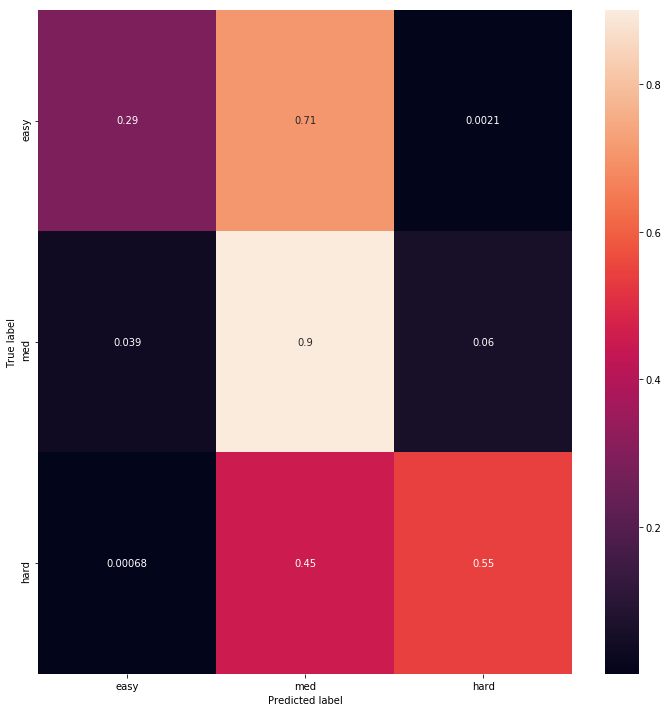

In [40]:
lr = LogisticRegression(C=562341325, solver='lbfgs', multi_class='multinomial', tol=0.01)
lr.fit(train_features, train_target)
lr_pred = lr.predict(test_features)
    
print_metrics(lr_pred)
plot_cm(lr_pred)

Accuracy: 0.668150176880064
Precision: [0.         0.66815018 0.        ]
Recall: [0. 1. 0.]


C:\Users\dorse\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


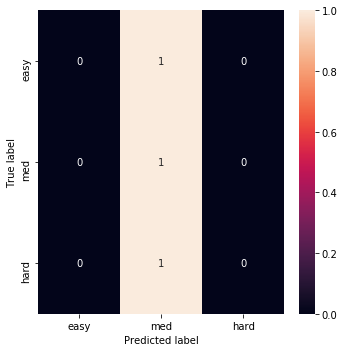

In [23]:
sgd = SGDClassifier(loss='log', penalty='elasticnet', l1_ratio=0.2)
sgd.fit(train_features, train_target)
sgd_pred = sgd.predict(test_features)
    
print_metrics(sgd_pred)
plot_cm(sgd_pred)

Accuracy: 0.7149378066872075
Precision: [0.71548117 0.70938786 0.80318091]
Recall: [0.11809392 0.97181896 0.27671233]


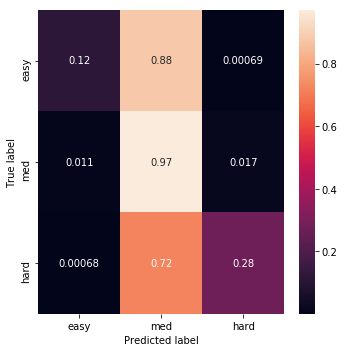

In [24]:
svm = LinearSVC(fit_intercept=True, random_state=0)
svm.fit(train_features, train_target)
svm_pred = svm.predict(test_features)

print_metrics(svm_pred)
plot_cm(svm_pred)

Accuracy: 0.722469473924455
Precision: [0.62820513 0.72279287 0.77272727]
Recall: [0.1691989  0.94944492 0.3609589 ]


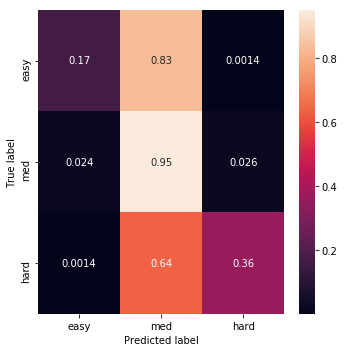

In [28]:
pac = PassiveAggressiveClassifier(C=1.04)
pac.fit(train_features, train_target)
pac_pred = pac.predict(test_features)

print_metrics(pac_pred)
plot_cm(pac_pred)

## Removing medium reviews, training and testing against only easy and medium reviews

In [ ]:
easy_med_df = df_by_usr[df_by_usr.reviewer_label!='med']

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(df_by_usr['text_agg'],
                                                                    df_by_usr['reviewer_label'])